Part 1 – Import the required Python, Pandas, Matplotlib, Seaborn packages
1. Load the US Housing data into a dataframe using pandas
2. Check the data types of each feature(column) in the dataset.
3. Generate a summary of the dataset for min, max, stddev,
quartile vales for 25%,50%,75%,90%,
4. List the names of columns/features in the dataset
5. Generate a pairplot of the features of the dataset.
6. Generate a correlation matrix and heatmap for the features
7. Create a list of dependent variable to independent variables to understand regression
among the features. From the data include Price to other numerical variables of the
Housing data.

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
import random as rd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('/content/USA_Housing.csv')
print(df)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                             4.09     230

In [ ]:
print(df.dtypes)

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object


In [ ]:
from pandas.compat.numpy import np
c=df['Price']
print(c)


0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64


In [ ]:
import numpy as np
b=np.array(c)
print(b)
print("*********************")
x=min(b)
y=max(b)
print("MINIMUN HOUSE PRICE:")
print(x)
print("MAXIMUM HOUSE PRICE:")
print(y)


[1059033.55787012 1505890.91484695 1058987.98787608 ... 1030729.58315229
 1198656.87240769 1298950.48026696]
*********************
MINIMUN HOUSE PRICE:
15938.657923287848
MAXIMUM HOUSE PRICE:
2469065.5941747027


In [ ]:
std_dev = df['Price'].std()
print("Standard Deviation:", std_dev)

Standard Deviation: 353117.62658106093


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column
q25 = df['Price'].quantile(0.25)
q50 = df['Price'].quantile(0.50)  # This is the same as the median
q75 = df['Price'].quantile(0.75)
q90 = df['Price'].quantile(0.90)
print("25th Percentile (Q1):", q25)
print("50th Percentile (Median or Q2):", q50)
print("75th Percentile (Q3):", q75)
print("90th Percentile (Q4):", q90)

25th Percentile (Q1): 997577.1350487601
50th Percentile (Median or Q2): 1232669.3779657914
75th Percentile (Q3): 1471210.2042115545
90th Percentile (Q4): 1684620.9544020062


In [ ]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

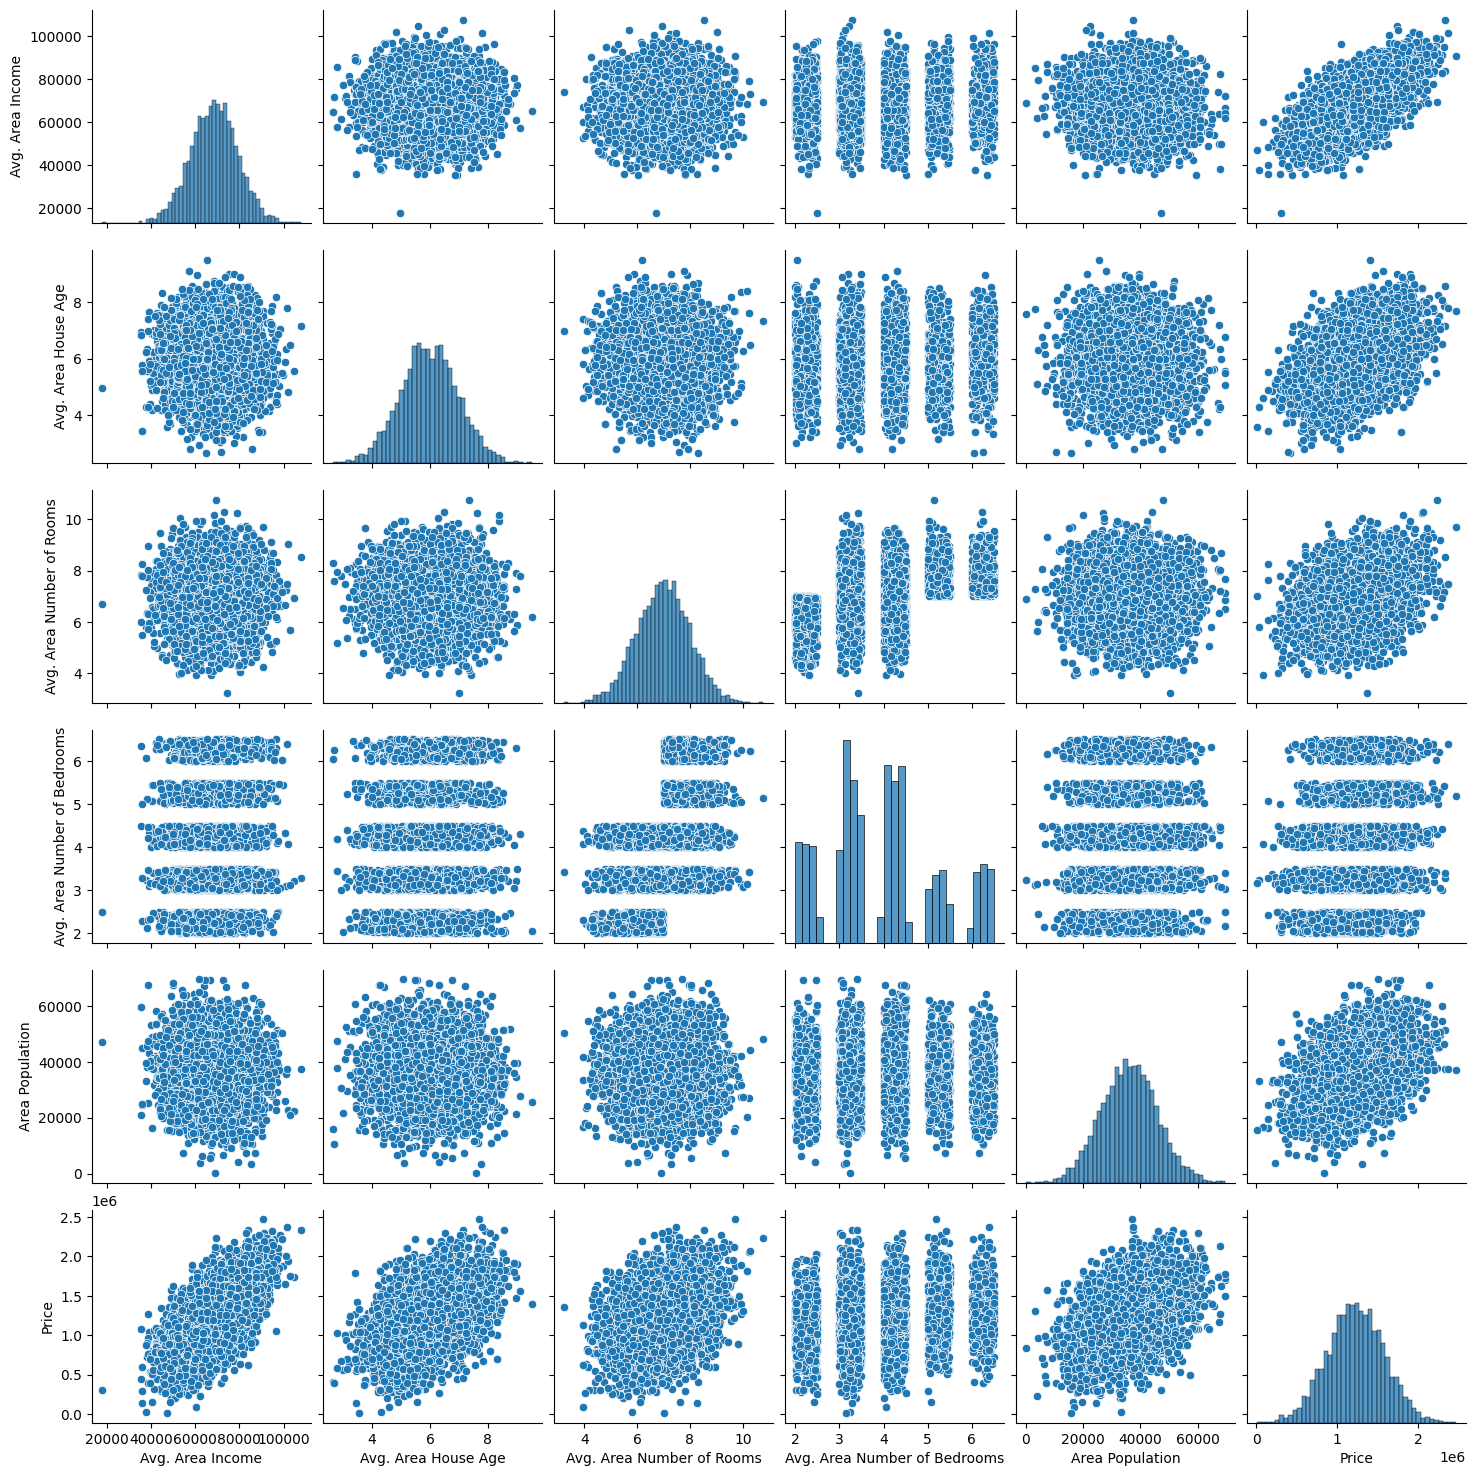

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
sns.pairplot(df)
plt.show()

<ipython-input-15-9ac8d6f22239>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


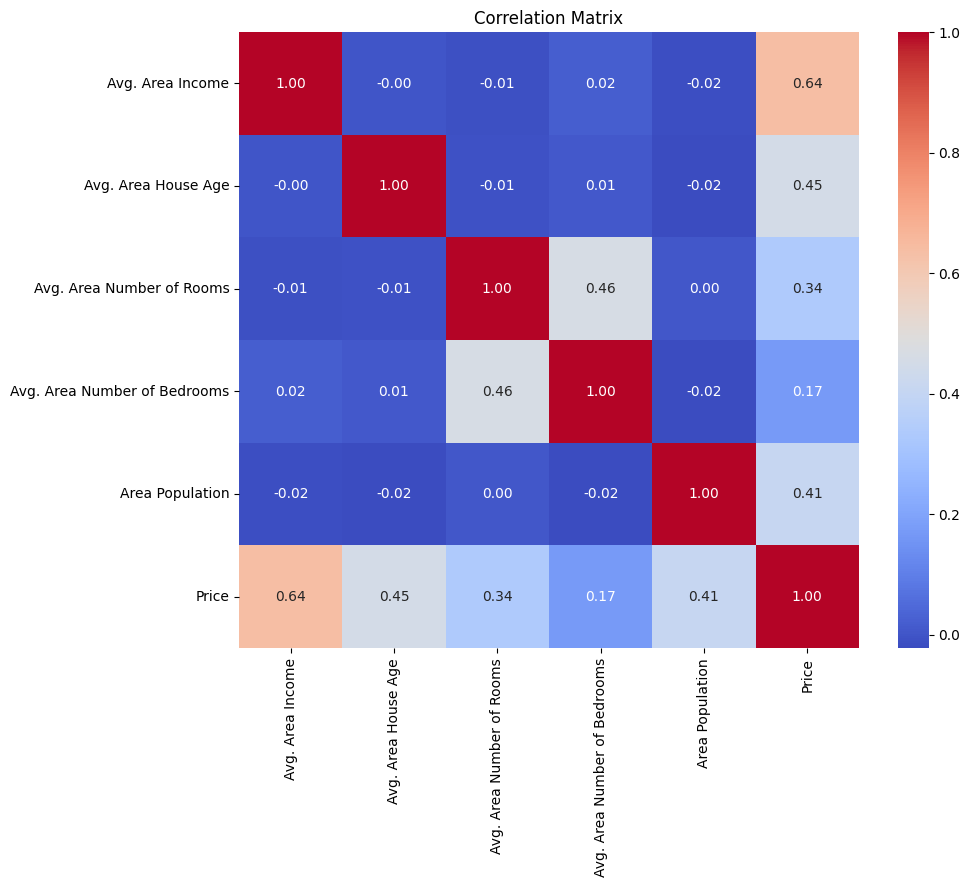

In [ ]:

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

<ipython-input-26-6175d103b930>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


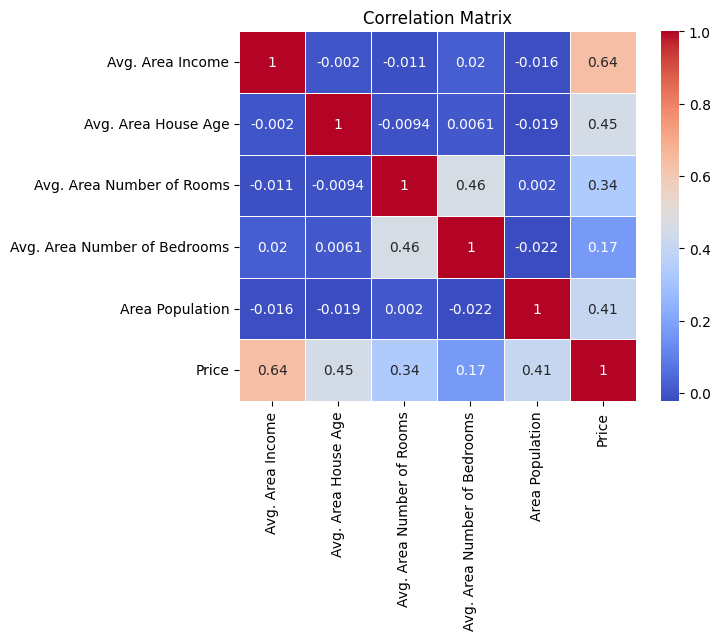

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Extract features (all columns except the target variable)
features = df.drop(columns=['Address','Price'])
# Extract the target variable
target =df['Price']

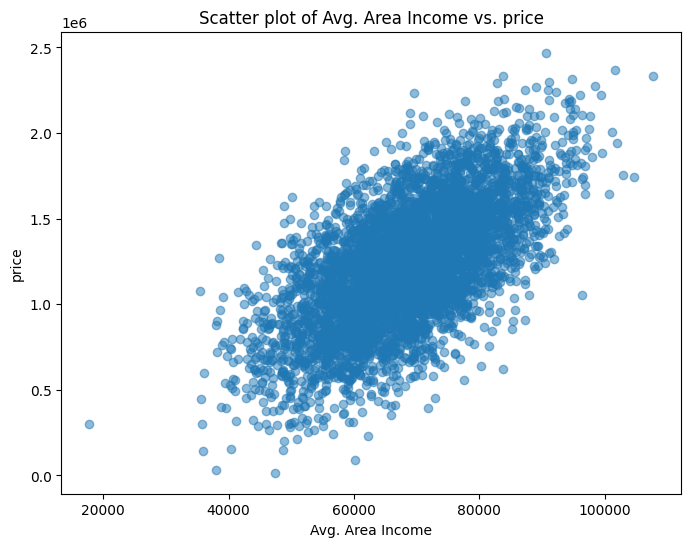

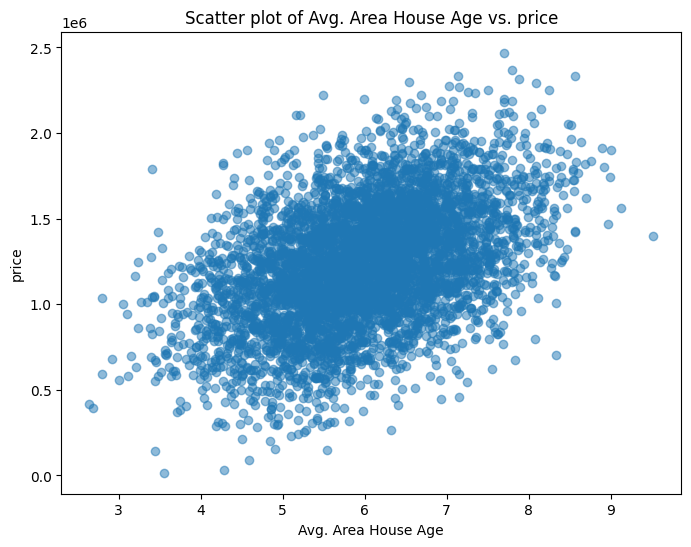

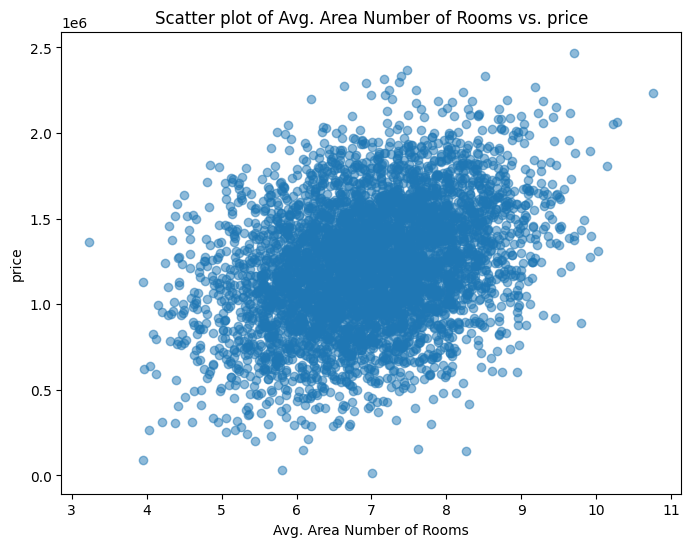

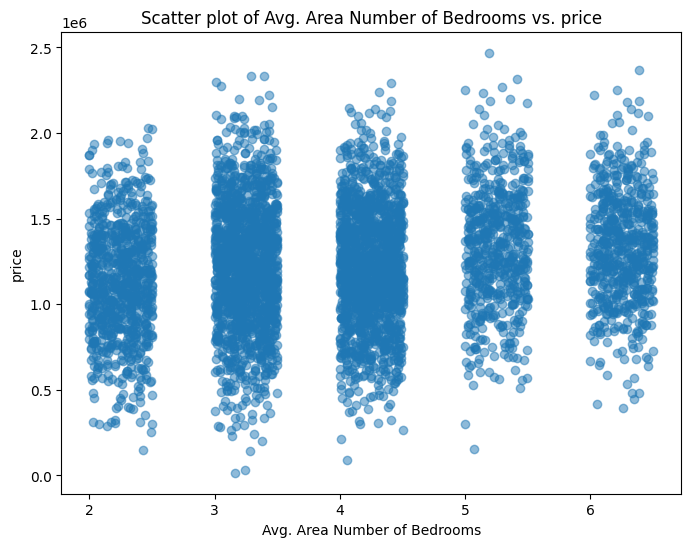

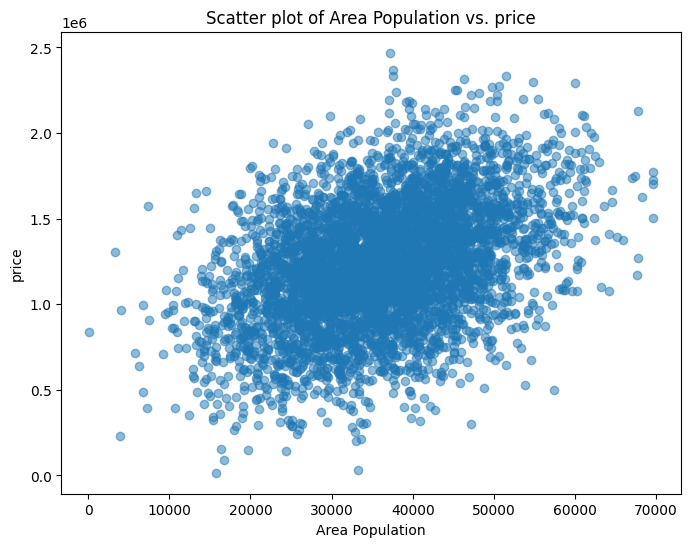

In [ ]:

import matplotlib.pyplot as plt
for i in features.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(features[i], target, alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('price')
    plt.title(f'Scatter plot of {i} vs. price')
    plt.show()

PART-2 – Model training and Fit the data to Model
1. Split the data generated from list created as X, Y is distributed using train test split
function as X train, Y train, X test, Y test
2. Apply the linear regression model of sklearn package
3. Fit the data to the Linear Model using fit
4. Check the intercepts and slope for the data and compute the cumulative distribution
function(cdf)



Dependent Variable: Price
Independent Variables: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Address']

Intercept (Encoded): -2591640.537822808
Coefficients (Encoded): [2.26971820e+01 1.58035211e+05 1.11022517e+05 ... 1.68742814e+05
 0.00000000e+00 3.04779844e+04]


<ipython-input-29-b8553945d07f>:37: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x * slope - intercept))


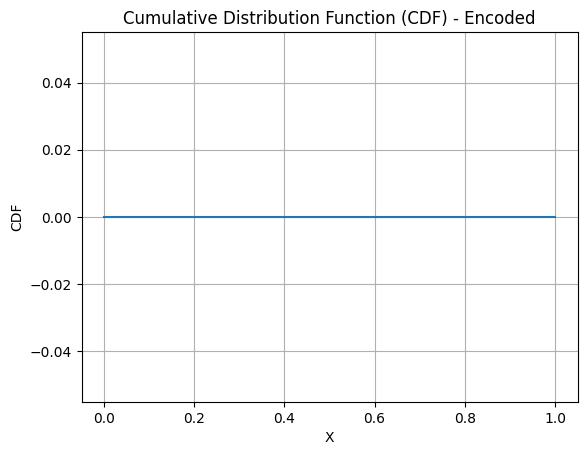

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Step 8: Create a list of dependent variable to independent variables to understand regression among the features
# In this case, we'll use 'Price' as the dependent variable and other numerical variables as independent variables
dependent_variable = 'Price'
independent_variables = [col for col in df.columns if col != dependent_variable]

print("\nDependent Variable:", dependent_variable)
print("Independent Variables:", independent_variables)
from sklearn.preprocessing import OneHotEncoder

# Step 1: Encode non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
data_encoded = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)

# Step 2: Split the encoded data
X_encoded = data_encoded.drop(dependent_variable, axis=1)
Y_encoded = data_encoded[dependent_variable]
X_train_encoded, X_test_encoded, Y_train_encoded, Y_test_encoded = train_test_split(X_encoded, Y_encoded, test_size=0.2, random_state=42)

# Step 3: Apply the linear regression model of sklearn package
model_encoded = LinearRegression()

# Step 4: Fit the data to the Linear Model using fit
model_encoded.fit(X_train_encoded, Y_train_encoded)

# Step 5: Check the intercepts and slope for the data
intercept_encoded = model_encoded.intercept_
coefficients_encoded = model_encoded.coef_
print("\nIntercept (Encoded):", intercept_encoded)
print("Coefficients (Encoded):", coefficients_encoded)

# Step 6: Compute the cumulative distribution function (CDF) of the fitted model
def compute_cdf(x, slope, intercept):
    return 1 / (1 + np.exp(-x * slope - intercept))

# Example usage of CDF for demonstration
x_values_encoded = np.linspace(0, 1, 100)  # Example x values
y_cdf_encoded = compute_cdf(x_values_encoded, coefficients_encoded[0], intercept_encoded)

# Plotting the CDF
plt.plot(x_values_encoded, y_cdf_encoded)
plt.title('Cumulative Distribution Function (CDF) - Encoded')
plt.xlabel('X')
plt.ylabel('CDF')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Assuming 'df' is your DataFrame and 'target_column' is the column you want to predict
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]  # Features used for prediction
y = df['Price']  # Target column to predict

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

# You can also print the coefficients and intercept of the model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Mean Absolute Error: 82657.94605892817
Mean Squared Error: 10549721686.161528
Root Mean Squared Error: 102711.8381013675
Coefficients: [2.16604083e+01 1.65809651e+05 1.20329408e+05 2.19309558e+03
 1.52858855e+01]
Intercept: -2646630.5310569573


part 3 – Model Evaluation Metrics
1. Calculate the standard error and t-statistic for the coefficients
2. Sort all the coefficients based on the cdf. Generate the scatter plots for the other
features considering price as dependent variable.
3. Compute the R2
for the coeffiecients using metrics.r2 score()
1
4. Plot the predictions of Linear Regression Model - histogram, scatterplot
5. Generate the evaluation regression error metrics - MAE, SSE, RMSE ,R2 using metrics
2 Compute the MinMax value between Observed Price and Expected Price for the US Housing Data
1. Write the python code to compute MinMax value of a Feature within Housing data.
We compute the MinMax value using the equation.
L minmax =
L minmax − min(L minmax)
max(L minmax) − min(L minmax)
2. Normalize the data and Print the MinMax value, plot the distribution of feature

Mean Absolute Error (MAE): 157515.93678484196
Mean Squared Error (MSE): 39080347168.55158
Root Mean Squared Error (RMSE): 197687.4987664915
R^2 Score: 0.6823574106318899


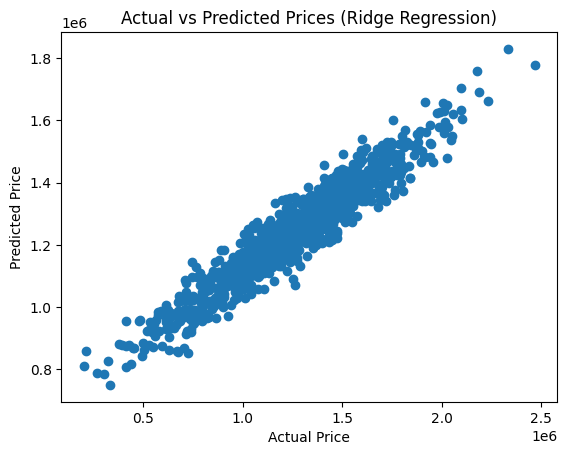

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Assume X_train_encoded, X_test_encoded, Y_train_encoded, Y_test_encoded are your training and testing data
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Fit Ridge regression model
alpha = 1.0  # You can adjust the regularization strength
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, Y_train_encoded)

# Predict on the test set
predictions_encoded = ridge_model.predict(X_test_scaled)

# Compute evaluation metrics
mae_encoded = mean_absolute_error(Y_test_encoded, predictions_encoded)
mse_encoded = mean_squared_error(Y_test_encoded, predictions_encoded)
rmse_encoded = np.sqrt(mse_encoded)
r2_encoded = r2_score(Y_test_encoded, predictions_encoded)

print("Mean Absolute Error (MAE):", mae_encoded)
print("Mean Squared Error (MSE):", mse_encoded)
print("Root Mean Squared Error (RMSE):", rmse_encoded)
print("R^2 Score:", r2_encoded)

# Plot the actual vs predicted prices
plt.scatter(Y_test_encoded, predictions_encoded)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Ridge Regression)')
plt.show()

In [ ]:

n_min=1
n_max=2
for i in range (237):
    z=((b[i]-x)/(y-x))*n_max-n_min
    print(z)

0       1.000000
1       0.400172
2       1.000087
3       0.676088
4       2.392152
          ...   
4995    0.997778
4996    0.422390
4997    1.055783
4998    0.763894
4999    0.626010
Name: Price, Length: 5000, dtype: float64
0       1.856791
1       1.000000
2       1.856916
3       1.394117
4       3.845335
          ...   
4995    1.853617
4996    1.031736
4997    1.936471
4998    1.519539
4999    1.322585
Name: Price, Length: 5000, dtype: float64
0       0.999913
1       0.400111
2       1.000000
3       0.676015
4       2.392004
          ...   
4995    0.997691
4996    0.422328
4997    1.055693
4998    0.763817
4999    0.625939
Name: Price, Length: 5000, dtype: float64
0       1.386510
1       0.670762
2       1.386614
3       1.000000
4       3.047702
          ...   
4995    1.383858
4996    0.697274
4997    1.453073
4998    1.104775
4999    0.940244
Name: Price, Length: 5000, dtype: float64
0       0.179192
1      -0.174464
2       0.179244
3      -0.011785
4       1.000000

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Extracting columns
avg_area_income =df['Avg. Area Income']
avg_area_house_age = df['Avg. Area House Age']
avg_area_num_rooms = df['Avg. Area Number of Rooms']
avg_area_num_bedrooms = df['Avg. Area Number of Bedrooms']
area_population = df['Area Population']
price =df['Price']
address = df['Address']

# Compute MinMax value for each feature
features = [avg_area_income, avg_area_house_age, avg_area_num_rooms, avg_area_num_bedrooms, area_population, price]
minmax_values = {}

for feature_name, feature_df in zip(housing_df.columns[:-1], features):  # excluding the 'Address' column
    minmax_values[feature_name] = (feature_data - feature_data.min()) / (feature_data.max() - feature_data.min())

# Plot the distribution of MinMax values for each feature
plt.figure(figsize=(12, 8))
for feature_name, minmax_data in minmax_values.items():
    plt.hist(minmax_data, bins=20, alpha=0.5, label=feature_name)
plt.xlabel('MinMax Value')
plt.ylabel('Frequency')
plt.title('Distribution of MinMax Values for Each Feature')
plt.legend()
plt.show()

# Print the MinMax values for each feature
for feature_name, minmax_data in minmax_values.items():
    print("MinMax value for", feature_name, ":", minmax_data)

NameError: name 'housing_df' is not defined